# Linked Lists

There are two varieties of 'Linked Lists' when it comes to data structures.

There are:
1. Singly linked lists or uni-directional lists.
2. Doubly linked lists or bi-directional lists.

In [1]:
mylist = []

help(mylist)

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |
 |  Built-in mutable sequence.
 |
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |
 |  Methods defined here:
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __contains__(self, key, /)
 |      Return bool(key in self).
 |
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |
 |  __getitem__(self, index, /)
 |      Return self[index].
 |
 |  __gt__(self, value, /)
 |      Return self>value.
 |
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __it

# Helpful Link
https://visualgo.net/en/list?slide=1

In [2]:
mylist = []
print(mylist)

mylist.append(1)
print(mylist)

mylist.append(2)
print(mylist)


[]
[1]
[1, 2]


# Assessment and Assembly

# Pseudocode for insert
So first make new_node
add to count
ref1 = index-1     #could this be self.__Node(index - 1)
ref2 = index       #could this be self.__Node(index)

Check if there's a head:
If no head, proceed like appending with no prior head (Could literally just use append)

If there's head:
    check if index == 0
        if index == 0
        make current head point to None,
        make new_node point Next to current head,
        make new_node the head,
    Otherwise check if size of the list == 1
        If size == 1
            append to the tail of the list

        If size of the list > 1: #Just working on how to reference the index
            make whichever index that points to the index we want to insert to point to new node,
            make new node point to the index the index we want to insert to,
            make new_node.index = index we want it to be # I don't think it's new_node.index but just the oncept of it.



REWORKING THIS TO MATCH THE SEARCH FROM ABOVE

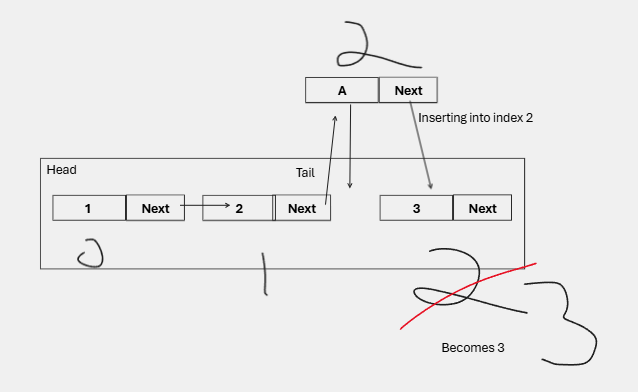

In [3]:
# From scratch implementation of SinglyLinkList

class SinglyLinkedList:
    class __Node:
        def __init__(self,datum):
            self.datum = datum
            self.next = None

    def __init__(self):
        self.head = None
        self.tail = None
        self.count = 0

    def append(self, value):
        new_node = self.__Node(value)
        self.count += 1
        if not self.head:
            self.head = new_node
            self.tail = new_node
        else:
            self.tail.next = new_node
            self.tail = new_node

    def insert(self, index, value):
        # This method inserts a new node with the "value" BEFORE the given "index".
        ref1 = self.head
        ref2 = 0
        new_node = self.__Node(value)
        if not self.head or index > self.count:
            self.append(value)
        elif index == 0:
            self.count += 1
            new_node.next = self.head
            self.head = new_node
        elif index < 0:
            raise IndexError("Please refrain from using a negative number")
        else:
            self.count += 1
            while ref1 and ref2 !=index:
                if ref2 == index-1:
                    new_node.next = ref1.next
                    ref1.next = new_node
                    break
                ref1 = ref1.next
                ref2 += 1
            return
            
    def remove(self, value):
        # This method removes the first instance of "value" and raises a ValueError if the value is not present in the list.
        current = self.head
        found = False
        prev = None
        while current.next and not found:
            if current.datum == value:
                found = True
            else:
                prev = current
                current = current.next
        if found:
            self.count -= 1
            if not prev:
                #This means the target value is at the head of our list
                self.head = self.head.next
            else:
                # This means the target value is somewhere in the middle or the tail of the list
                prev.next = current.next
                if current == self.tail:
                    self.tail = prev
            if not self.head:
                self.tail = None
            else:
                raise ValueError("Target value not found")

    def index(self, value):
        # This method returns the position in the list of the given "value" if it is present in the list
        # Otherwise, it raises a ValueError if the value is not present in the list
        ref1 = self.head
        ref2 = 0
        found = False
        while ref1 and not found:
            if ref1.datum == value:
                found = True
            else:
                ref2 += 1
                ref1 = current.next
        if found:
            return current
        raise ValueError("Value not found")

    def search(self, index):
        if self.head:
            current = self.head
            iteration = 0
            while current and iteration != index:
                if iteration == index:
                    break
                current = current.next
                iteration += 1
            return current.datum
        raise IndexError("This list is empty")
    
    def __str__(self):
        out = "["
        current = self.head
        if current:
            out += "%s" % current.datum
            current = current.next
            while current:
                out += ", %s" % current.datum
                current = current.next
        out += "]"
        return out

    def __len__(self):
        # This method should return the total number of Nodes in this list.
        return self.count
    

In [9]:
sll = SinglyLinkedList()
print(sll)

sll.append(1)
print(sll)

sll.append(2)
print(sll)

sll.insert(1, "A")
print(sll)
print(sll.count)


[]
[1]
[1, 2]
[1, A, 2]
3
